<h1 style="text-align: center;">TP3- Desenvolvimento de Serviços Web e Testes com Java</h1>

| ![Logo Infnet](https://mir-s3-cdn-cf.behance.net/projects/404/9115f025917929.5547cdc9cda40.jpg) |
|:-------------------------------------------------------------------------:|


<h5 style="text-align: center;">Professor: Bernardo Prates || Estudante: Paulo Henrique de Paula Dias</h5>

<h5 style="text-align: center;">Data limite: 02/06/2025</h5>

##### Links úteis:

Repositório Git Hub - [Link](https://github.com/PAULOHENRIQUEDEPAULADIAS/Paulo_Dias_DWJ_TP3)

OBS: Esse projeto foi craido como um sistema de opções, onde o número do exercício é selecionado e o resultado é exibido no console.

### Ponto de Partida


Você foi contratado como desenvolvedor júnior para trabalhar em uma equipe que está construindo um sistema de integração com serviços externos. Para praticar os conceitos de HTTP e REST, a empresa disponibilizou duas APIs de simulação para que você possa desenvolver suas habilidades em Java usando a biblioteca HttpURLConnection.

Essas APIs simulam sistemas de gerenciamento de entidades e itens. São projetadas para aprendizado: respondem de forma previsível, não exigem autenticação e permitem a prática de operações como GET, POST, PUT, DELETE, OPTIONS, entre outras.

### Orientações Gerais
* Todos os exercícios devem ser feitos em Java, utilizando HttpURLConnection
* Utilize BufferedReader para ler as respostas e DataOutputStream para enviar dados
* Sempre trate e imprima o código de status HTTP e a resposta do servidor
* Organize os exercícios em classes distintas ou métodos bem definidos dentro do mesmo projeto<br>
### APIs utilizadas
* API de Entidades (Stateless): https://apichallenges.eviltester.com/sim/entities
    * Ideal para praticar requisições básicas sem persistência real.
* Simple API (com persistência temporária): https://apichallenges.eviltester.com/simpleapi/items
    * Permite testar operações completas com controle de dados, incluindo geração de ISBNs.

### Código presente no arquivo Main.java

    package org.example;
    
    import org.example.exercise.*;
    import java.io.IOException;
    import java.net.URISyntaxException;
    import java.util.Scanner;
    
    public class Main {
        public static void main(String[] args) throws IOException, URISyntaxException {
            Scanner sc = new Scanner(System.in);
    
            while (true){
                System.out.println("\n**** Selecione o exercício desejado ****");
                System.out.println("01 - GET simples de todas as entidades");
                System.out.println("02 - GET de entidade específica");
                System.out.println("03 - GET de entidade inexistente");
                System.out.println("04 - GET com parâmetros na URL");
                System.out.println("05 - POST criando uma nova entidade");
                System.out.println("06 - GET da entidade criada");
                System.out.println("07 - POST para atualizar uma entidade");
                System.out.println("08 - PUT para atualizar entidade");
                System.out.println("09 - DELETE de entidade válida");
                System.out.println("10 - DELETE inválido");
                System.out.println("11 - OPTIONS com verificação de métodos");
                System.out.println("12 - Experimentos com a Simple API");
                System.out.println("0 - Sair\n");
    
                System.out.print("Digite o número do exercício desejado: ");
                String option = sc.nextLine();
    
                if(!option.matches("^(0|[1-9]|1[0-2])$")){
                    System.out.println("Por favor digite um número válido");
                    continue;
                }
    
                int value = Integer.parseInt(option);
    
                if (value == 0)
                {
                    sc.close();
                    break;
                }
                else if (value == 1)
                {
                    ex01 ex01 = new ex01();
                    ex01.Ex01();
                }
                else if (value == 2)
                {
                    ex02 ex02 = new ex02();
                    ex02.Ex02();
                }
                else if (value == 3)
                {
                    ex03 ex03 = new ex03();
                    ex03.Ex03();
                }
                else if (value == 4)
                {
                    ex04 ex04 = new ex04();
                    ex04.Ex04();
                }
                else if (value == 5)
                {
                    ex05 ex05 = new ex05();
                    ex05.Ex05();
                }
                else if (value == 6)
                {
                    ex06 ex06 = new ex06();
                    ex06.Ex06();
                }
                else if (value == 7)
                {
                    ex07 ex07 = new ex07();
                    ex07.Ex07();
                }
                else if (value == 8)
                {
                    ex08 ex08 = new ex08();
                    ex08.Ex08();
                }
                else if (value == 9)
                {
                    ex09 ex09 = new ex09();
                    ex09.Ex09();
                }
                else if (value == 10)
                {
                    ex10 ex10 = new ex10();
                    ex10.Ex10();
                }
                else if (value == 11)
                {
                    ex11 ex11 = new ex11();
                    ex11.Ex11();
                }
                else if (value == 12)
                {
                    ex12 ex12 = new ex12();
                    ex12.Ex12();
                }
            }
        }
    }

### Exercício 1 - GET simples de todas as entidades

* Endpoint:GET https://apichallenges.eviltester.com/sim/entities

* Realize uma requisição GET para listar todas as entidades. Imprima no console o código de status e o corpo da resposta (JSON com 10 entidades fixas).

### Resolução do exercício 1

Para realização da requisição, como orientado em aula, fiz os métodos de requisição separadamente. Dessa forma, no arquivo SimpleHttpCliente.java temos o seguinte código. Responsável pela requisição da conexão, o get recebe uma URL (endereço API) e estabelece a conexão através do método "getConnection" que recebe dois parâmetros, uma URL e o método a ser utilizado, à partir dai ele recebe o status da requisição e imprime, juntamente com a resposta provida pela conexão. O método getConection recebe dois parâmetros, uma URL (link da API) e o método de requisição desejado, estabelece a conexão URL, abre a conexão, "seta" o método desejado e retorna a conexão estabelecida. E por fim, o método "lerResposta" recebe essa conexão já estabelecida, faz a leitura da API, e através de um StringBuilder, faz o preenchimento dos dados recolhidos, em seguida encerra a conexão e retorna a String recolhida.

    package org.example.client;
    
    import com.google.gson.Gson;
    
    import java.io.BufferedReader;
    import java.io.IOException;
    import java.io.InputStreamReader;
    import java.io.OutputStream;
    import java.net.*;
    import java.nio.charset.StandardCharsets;
    
    public class SimpleHttpClient {
    
        private static final Gson gson = new Gson();
    
        public static String get(String urlStr) throws IOException, URISyntaxException {
            HttpURLConnection conn = getConnection(urlStr, "GET");
    
            int status = conn.getResponseCode();
            System.out.println("Response Status: "+status);
            return lerResposta(conn);
        }
    
        public static HttpURLConnection getConnection(String urlStr, String requestMethod) throws URISyntaxException, IOException {
            URL url = new URI(urlStr).toURL();
            HttpURLConnection conn = (HttpURLConnection) url.openConnection();
            conn.setRequestMethod(requestMethod);
            conn.setRequestProperty("Accept", "application/json");
    
            if(requestMethod.equals("POST")){
                conn.setRequestProperty("Content-Type", "application/json; charset=UTF-8");
                conn.setDoOutput(true);
            }
            return conn;
        }
    
        private static String lerResposta(HttpURLConnection conn) throws IOException {
            BufferedReader in = new BufferedReader(new InputStreamReader((conn.getInputStream())));
    
            String inputLine;
            StringBuilder content = new StringBuilder();
            while((inputLine = in.readLine()) != null){
                content.append(inputLine).append('\n');
            }
    
            in.close();
            conn.disconnect();
            return content.toString();
        }
    }


Para realizar a requisição do exercício, temos a chamada no arquivo Main.java. Aqui a primeira etapa é chamar o link da API (URL), estabelecemos um Gson, JsonElement e uma String prettyJason para que a impressão seja no formato Json e não String. Logo prettyJason é impresso.

    public void Ex01() throws IOException, URISyntaxException {
            String getAllEntities = SimpleHttpClient.get("https://apichallenges.eviltester.com/sim/entities");
            Gson gson = new GsonBuilder().setPrettyPrinting().create();
            JsonElement jsonElement = JsonParser.parseString(getAllEntities);
            String prettyJson = gson.toJson(jsonElement);
    
            System.out.println(prettyJson);
        }

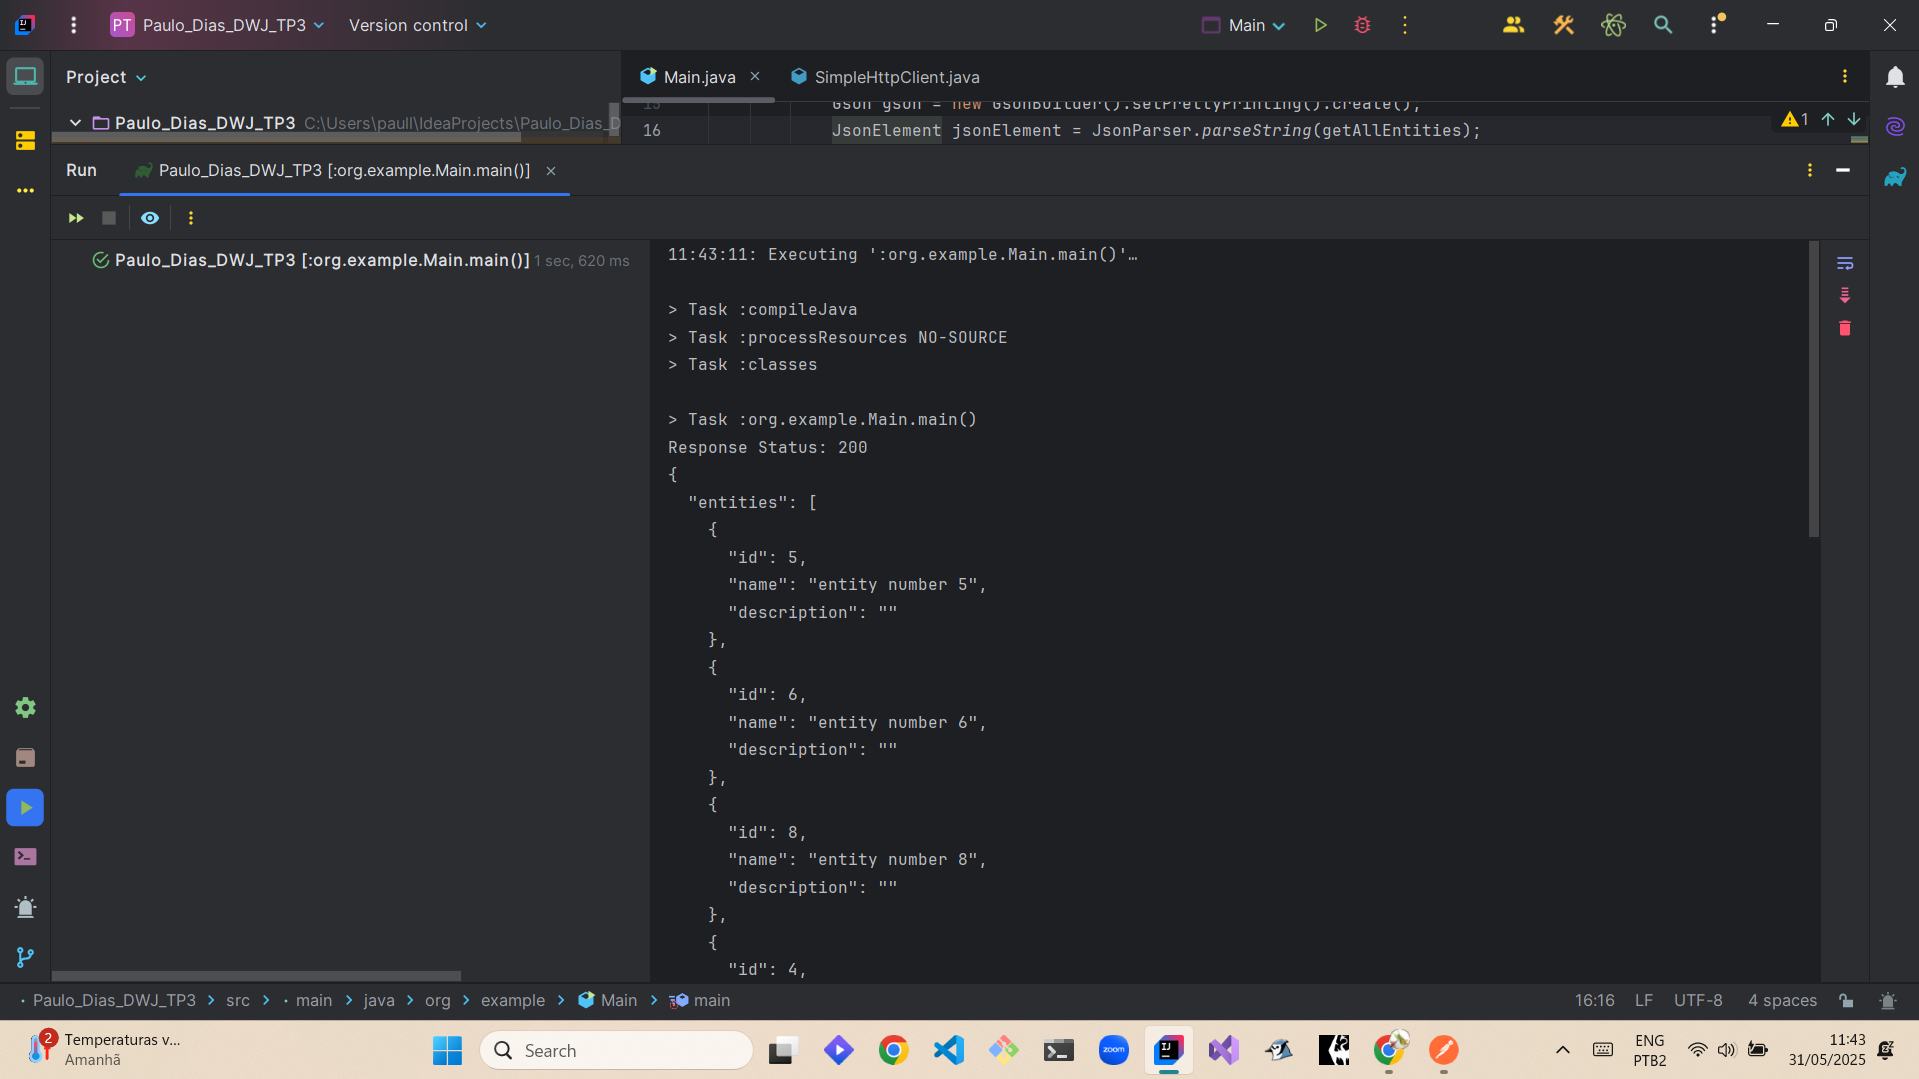

### Exercício 2 - GET de entidade específica

* Endpoint:GET https://apichallenges.eviltester.com/sim/entities/1 (e IDs de 2 a 8)

* Recupere e imprima os dados de entidades específicas. Observe os conteúdos e compare as respostas.

### Resolução do exercício 2

O mesmo código do exercício anterior está apto a resgatar com parâmetro id. Conforme demonstrado abaixo 

           
            String getEntitiesById = SimpleHttpClient.get("https://apichallenges.eviltester.com/sim/entities/1");

            Gson gson = new GsonBuilder().setPrettyPrinting().create();
            JsonElement jsonElement = JsonParser.parseString(getEntitiesById);
            String prettyJson = gson.toJson(jsonElement);

            System.out.println(prettyJson);

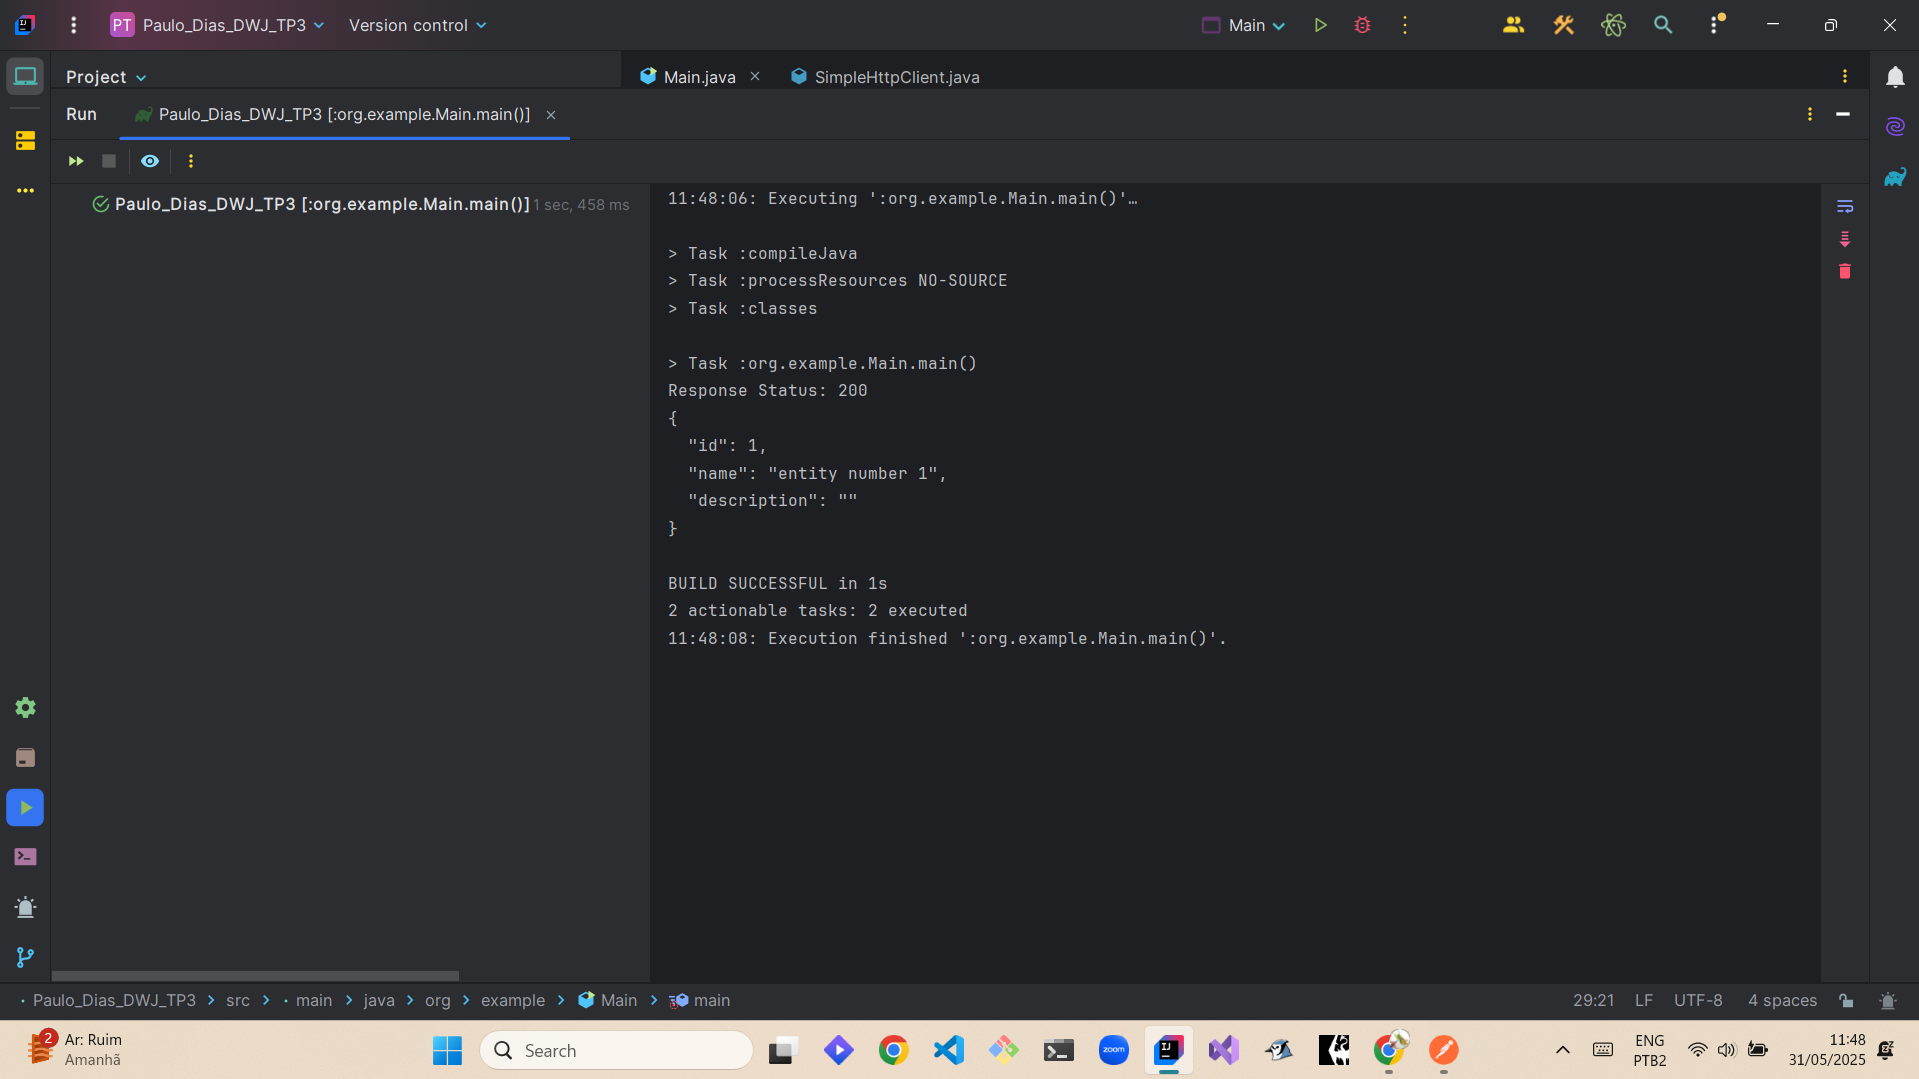

Para melhorar e agilizar a requisição, insiro o código dentro de um loop for conforme abaixo.

    for (int id = 1; id <= 8; id++){
                    String requisition = "https://apichallenges.eviltester.com/sim/entities/" + id;
                    String getEntitiesById = SimpleHttpClient.get(requisition);
    
                    Gson gson = new GsonBuilder().setPrettyPrinting().create();
                    JsonElement jsonElement = JsonParser.parseString(getEntitiesById);
                    String prettyJson = gson.toJson(jsonElement);
    
                    System.out.println(prettyJson);
    
                }

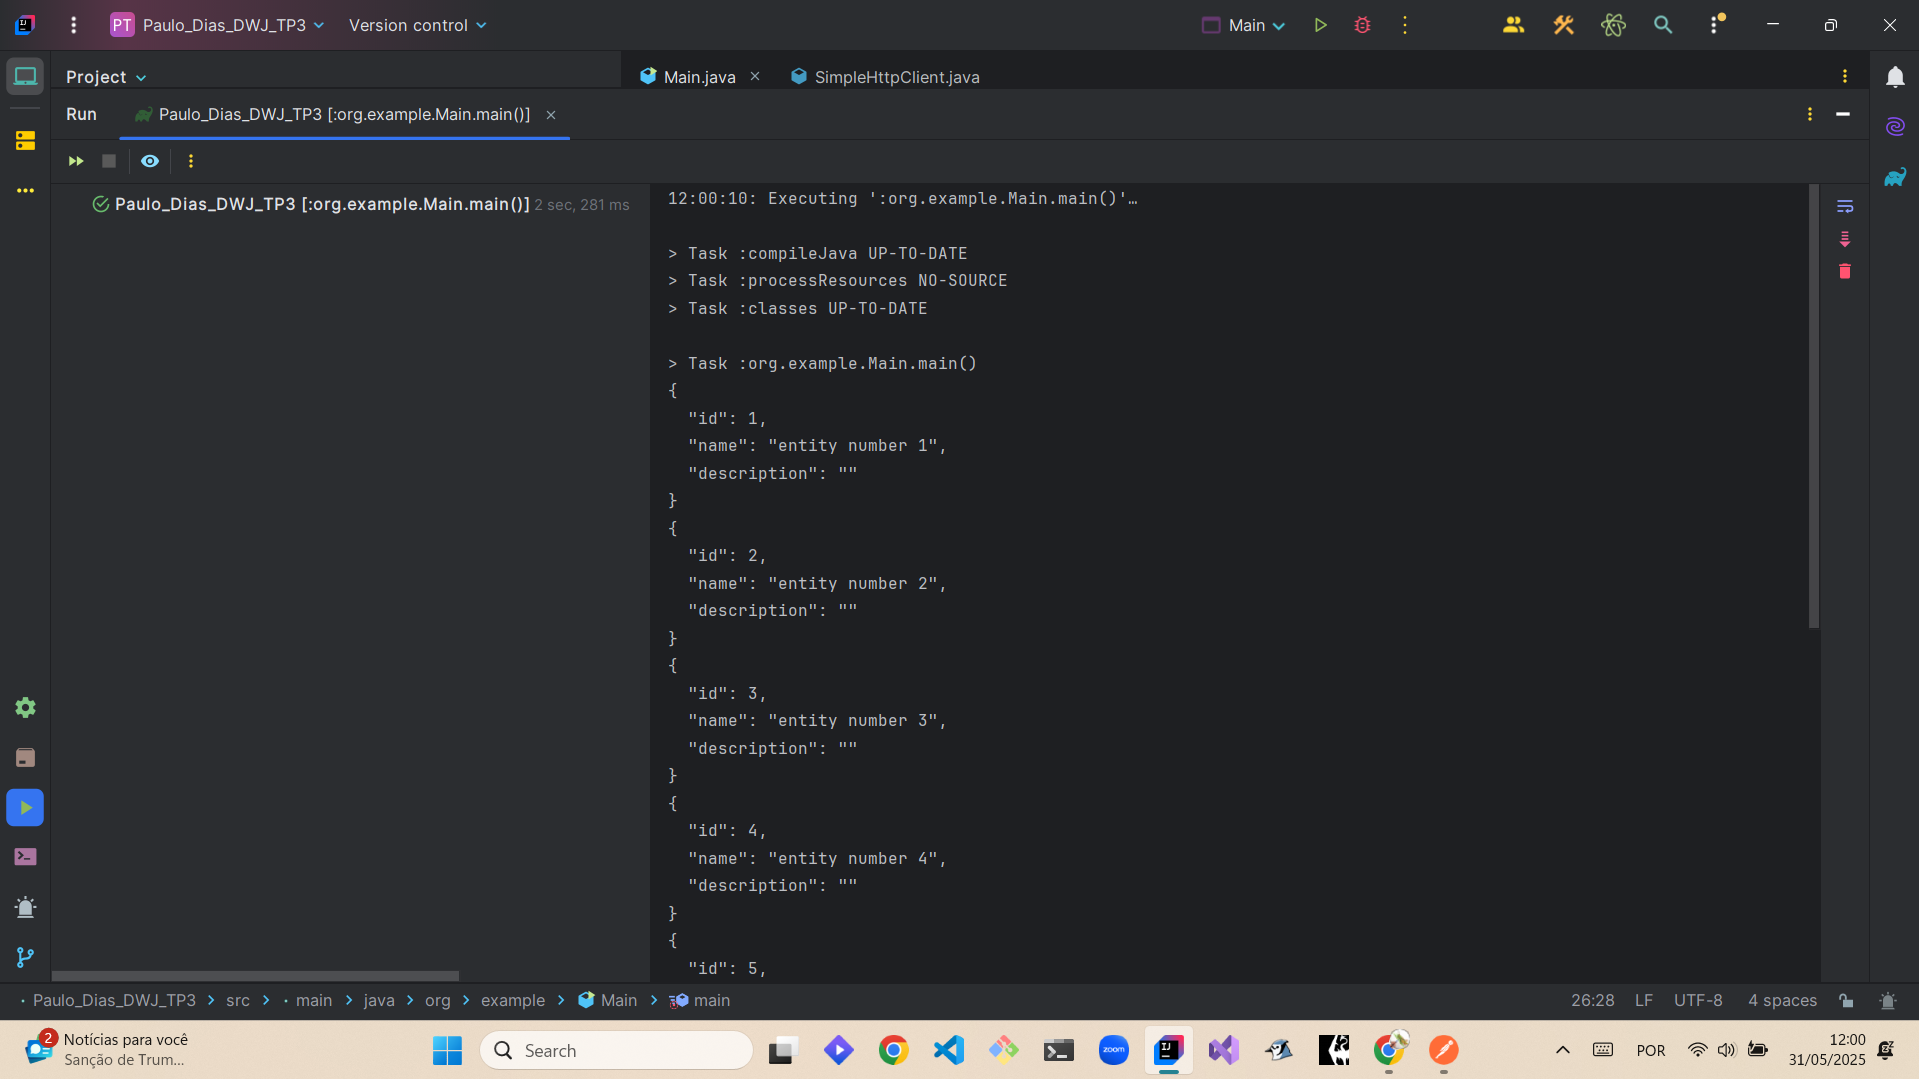

Todas as entidades retornaram iguais com exessões dos Id's e name, onde cada possui um número identificador igual ao id correspondente.

### Exercício 3 - GET de entidade inexistente

* Endpoint:GET https://apichallenges.eviltester.com/sim/entities/13

* Faça uma requisição para um ID inexistente. O programa deve capturar o status 404 e exibir mensagem adequada.

### Resolução do exercício 3

Código correspondente ao exercício

    String getInexistentEntity = SimpleHttpClient.get("https://apichallenges.eviltester.com/sim/entities/13");
    
    Gson gson = new GsonBuilder().setPrettyPrinting().create();
    JsonElement jsonElement = JsonParser.parseString(getInexistentEntity);
    String prettyJson = gson.toJson(jsonElement);
    
    System.out.println(prettyJson);

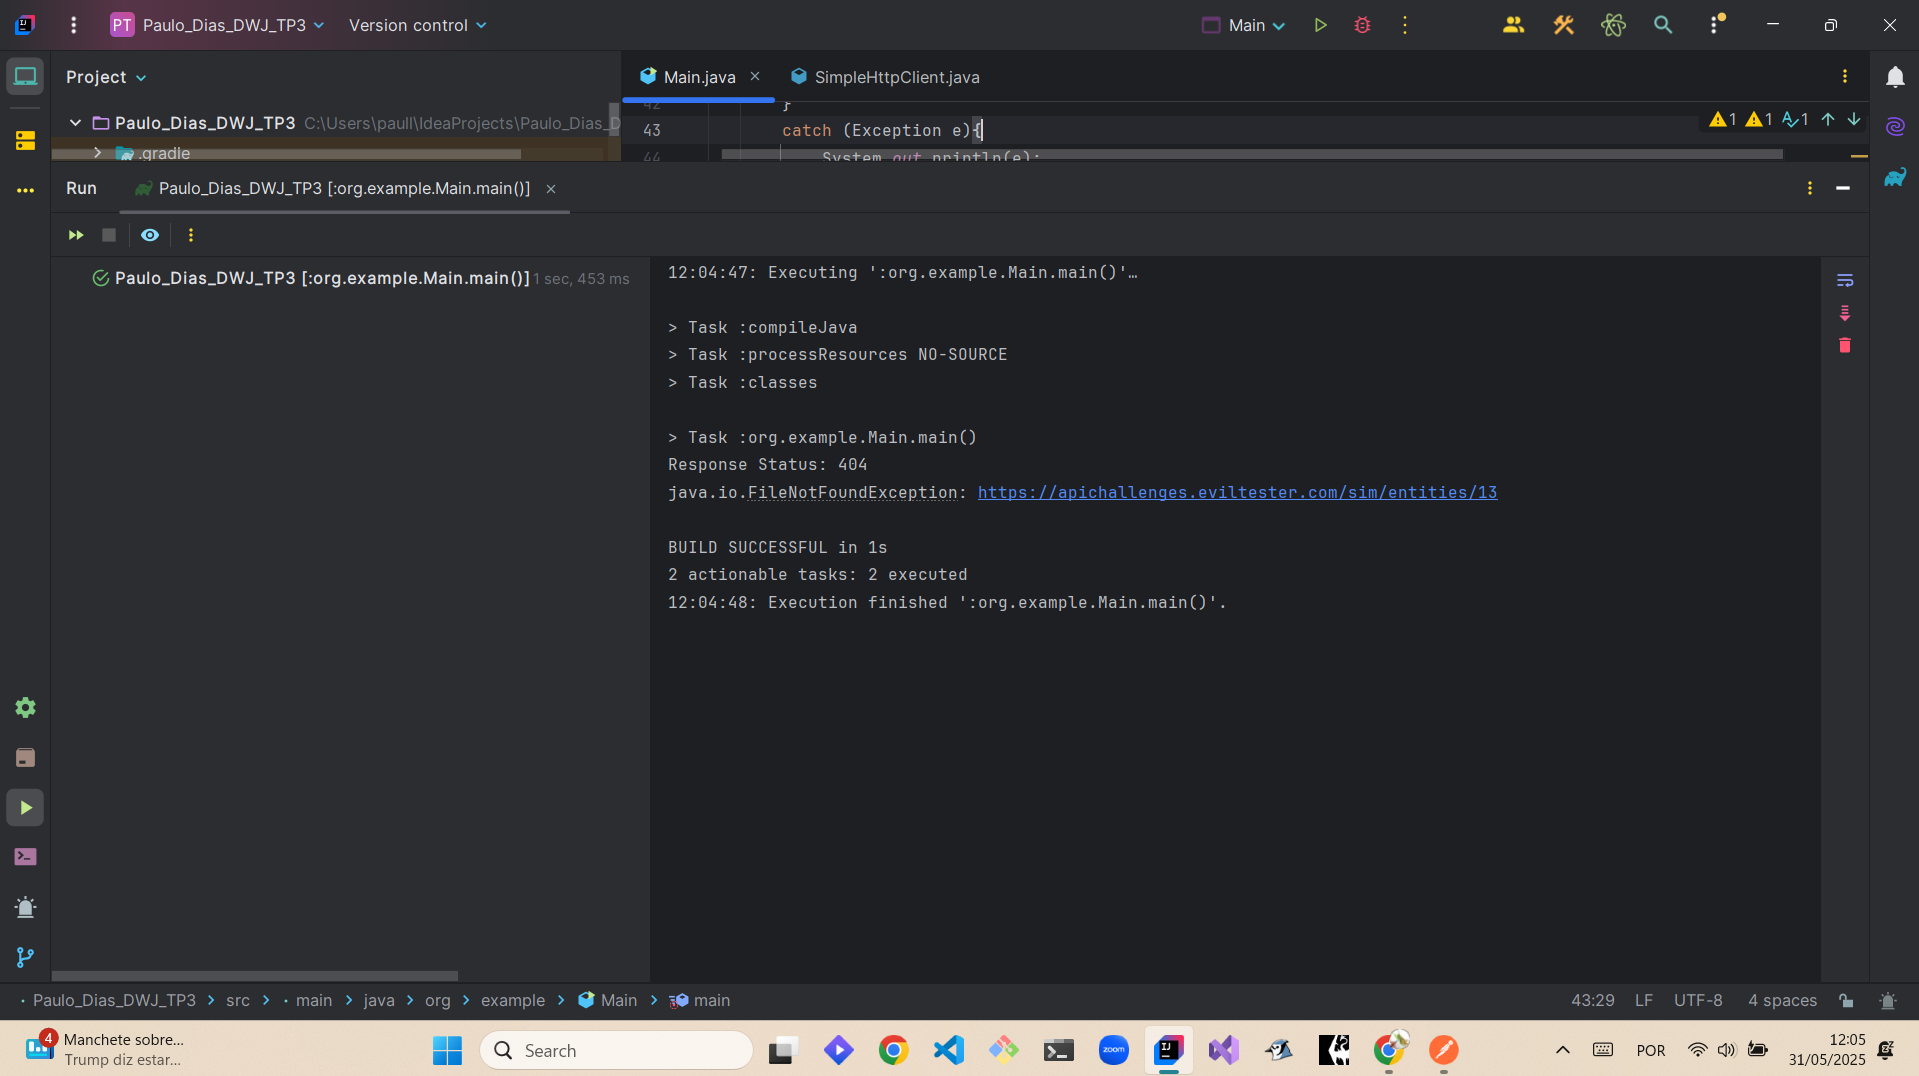

### Exercício 4 - GET com parâmetros na URL

* Endpoint:GET https://apichallenges.eviltester.com/sim/entities?categoria=teste&limite=5

* Monte uma URL com parâmetros fictícios. Envie a requisição e imprima a URL final montada e o código de resposta.

### Resolução do exercício 4

    public void Ex04() throws IOException, URISyntaxException {
        String url = "https://apichallenges.eviltester.com/sim/entities?categoria=teste&limite=5";
        String getWithInexistingParameter = SimpleHttpClient.get(url);

        Gson gson = new GsonBuilder().setPrettyPrinting().create();
        JsonElement jsonElement = JsonParser.parseString(getWithInexistingParameter);
        String prettyJson = gson.toJson(jsonElement);

        System.out.println(url);
        System.out.println(prettyJson);
    }

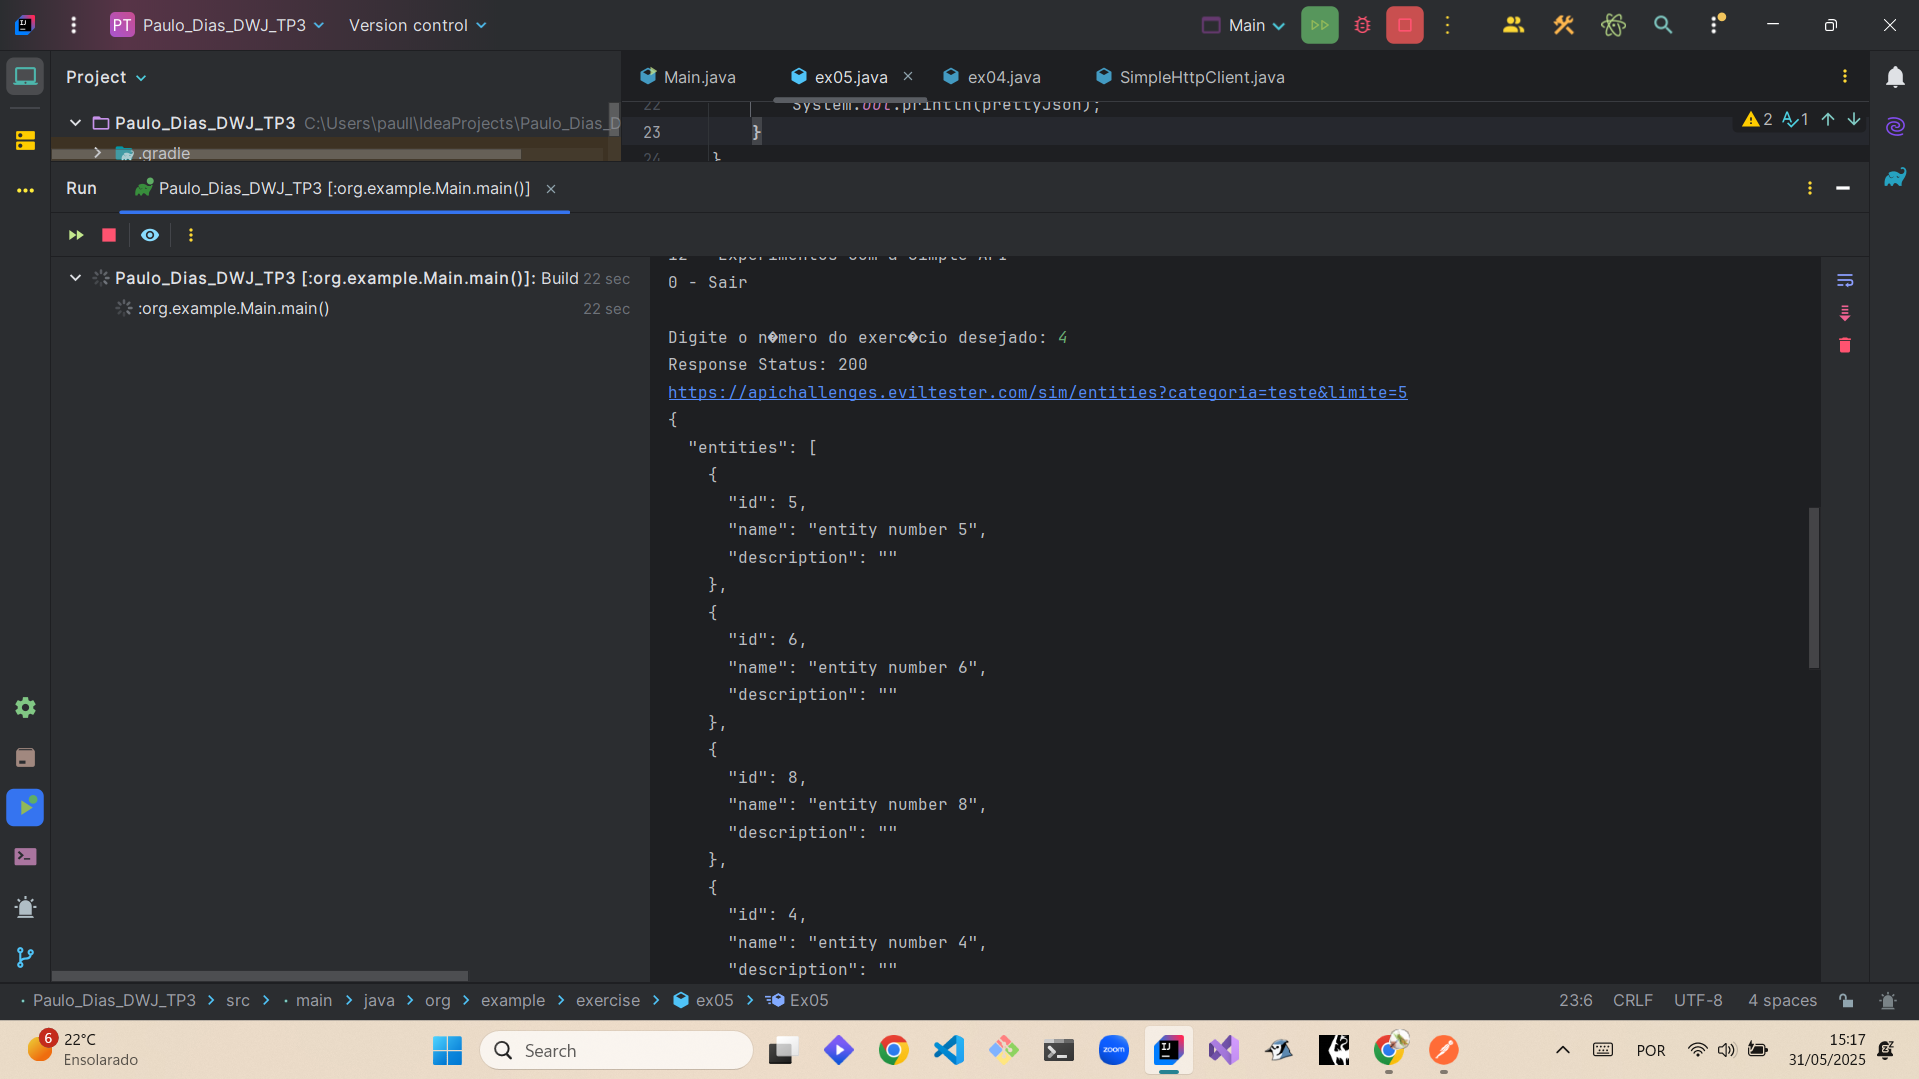

### Exercício 5 - POST criando uma nova entidade

* Endpoint:POST https://apichallenges.eviltester.com/sim/entities

* Envie o seguinte JSON:

    {"name": "aluno"}

* Imprima o corpo da resposta e identifique o ID gerado (geralmente 11).

### Resolução do exercício 5

Para o exercício acima, fiquei confuso pois ela sempre retorna "bob" como name. Assim adicionei um campo que comprova o envio correto dos dados como name: aluno.

    public void Ex05() throws IOException, URISyntaxException {
            Gson gson = new Gson();
            String url = "https://apichallenges.eviltester.com/sim/entities";
            PostRequest postRequest = new PostRequest("aluno" );
            String post = SimpleHttpClient.post(url, postRequest);
    
            System.out.println("Post Response: " + post);
    
            String jsonInputString = gson.toJson(postRequest);
            System.out.println("Corpo enviado: " + jsonInputString);
        }

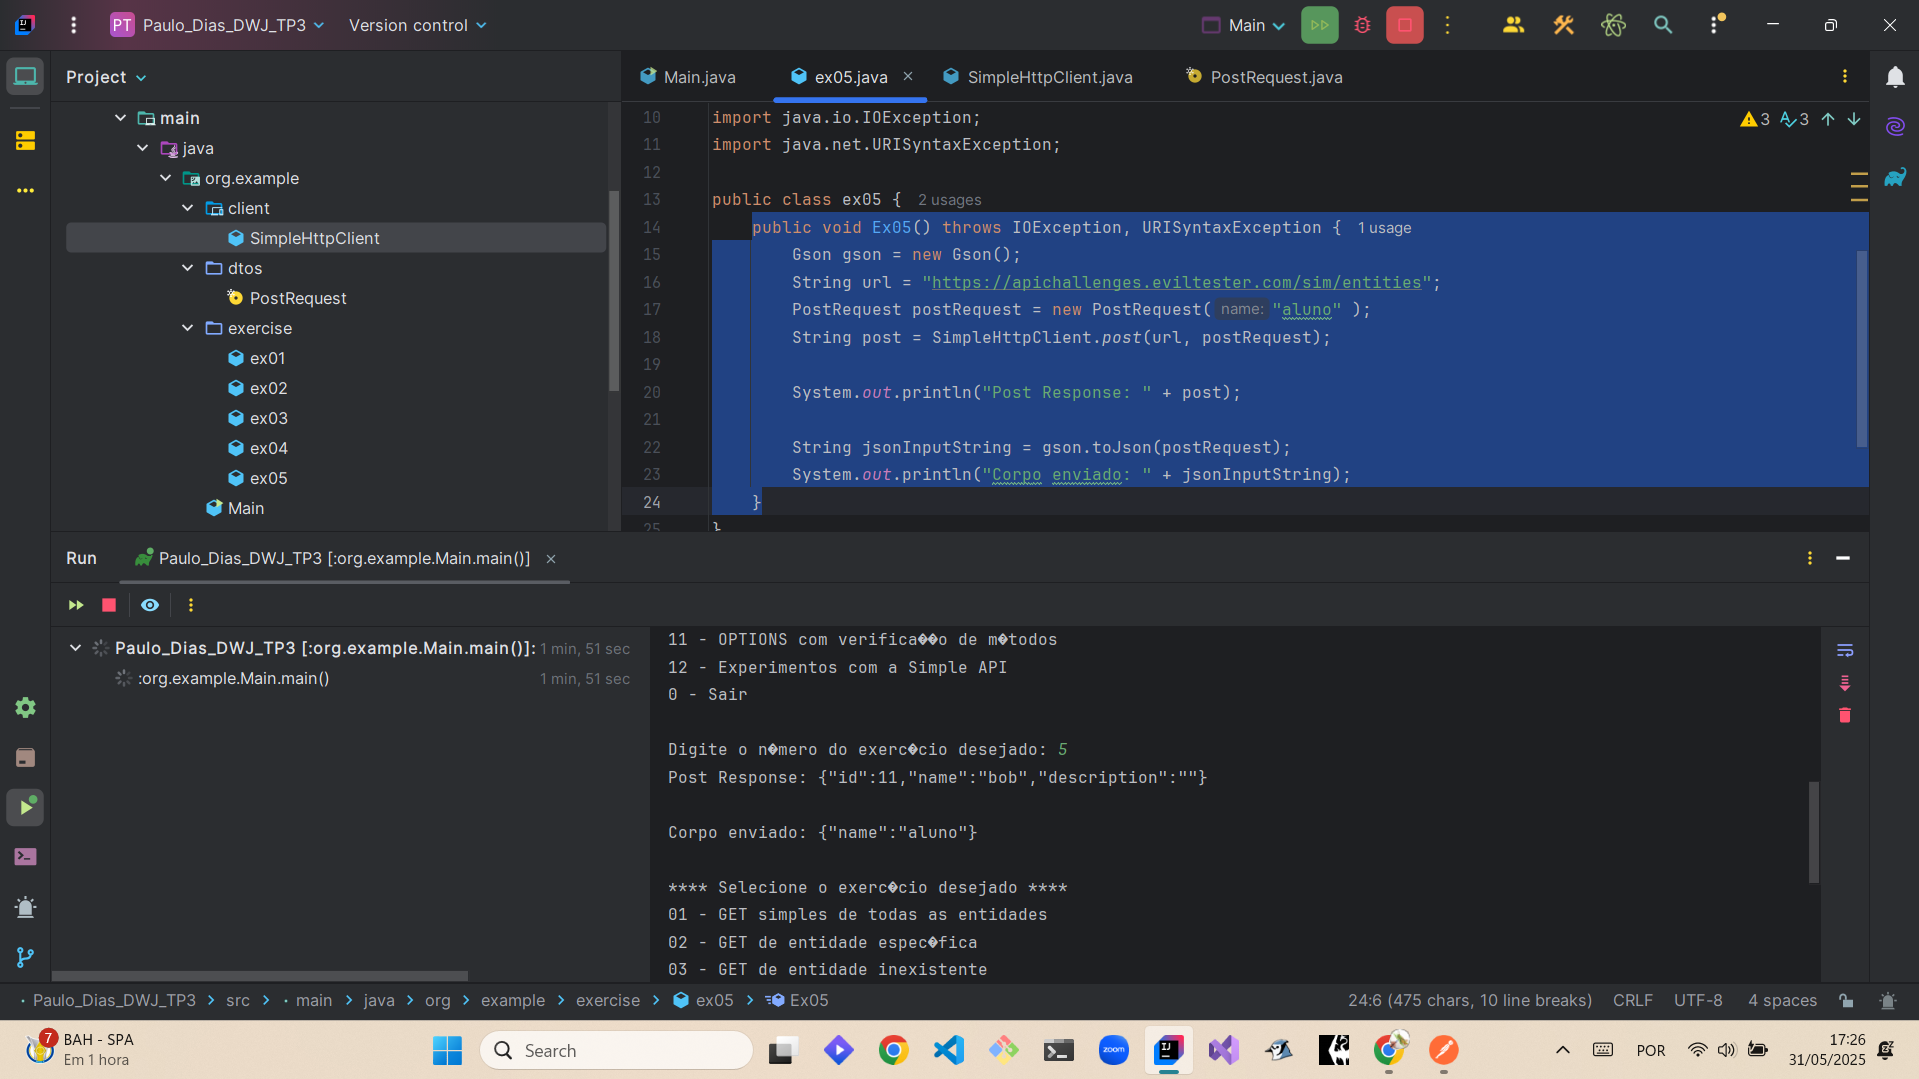

### Exercício 6 - GET da entidade criada

* Endpoint:GET https://apichallenges.eviltester.com/sim/entities/11

* Recupere a entidade recém-criada usando seu ID e verifique o conteúdo retornado.

### Resolução do exercício 6

    public void Ex06() throws IOException, URISyntaxException {
            String url = "https://apichallenges.eviltester.com/sim/entities/11";
            String getWithInexistingParameter = SimpleHttpClient.get(url);
    
            Gson gson = new GsonBuilder().setPrettyPrinting().create();
            JsonElement jsonElement = JsonParser.parseString(getWithInexistingParameter);
            String prettyJson = gson.toJson(jsonElement);
    
            System.out.println(url);
            System.out.println(prettyJson);
        }

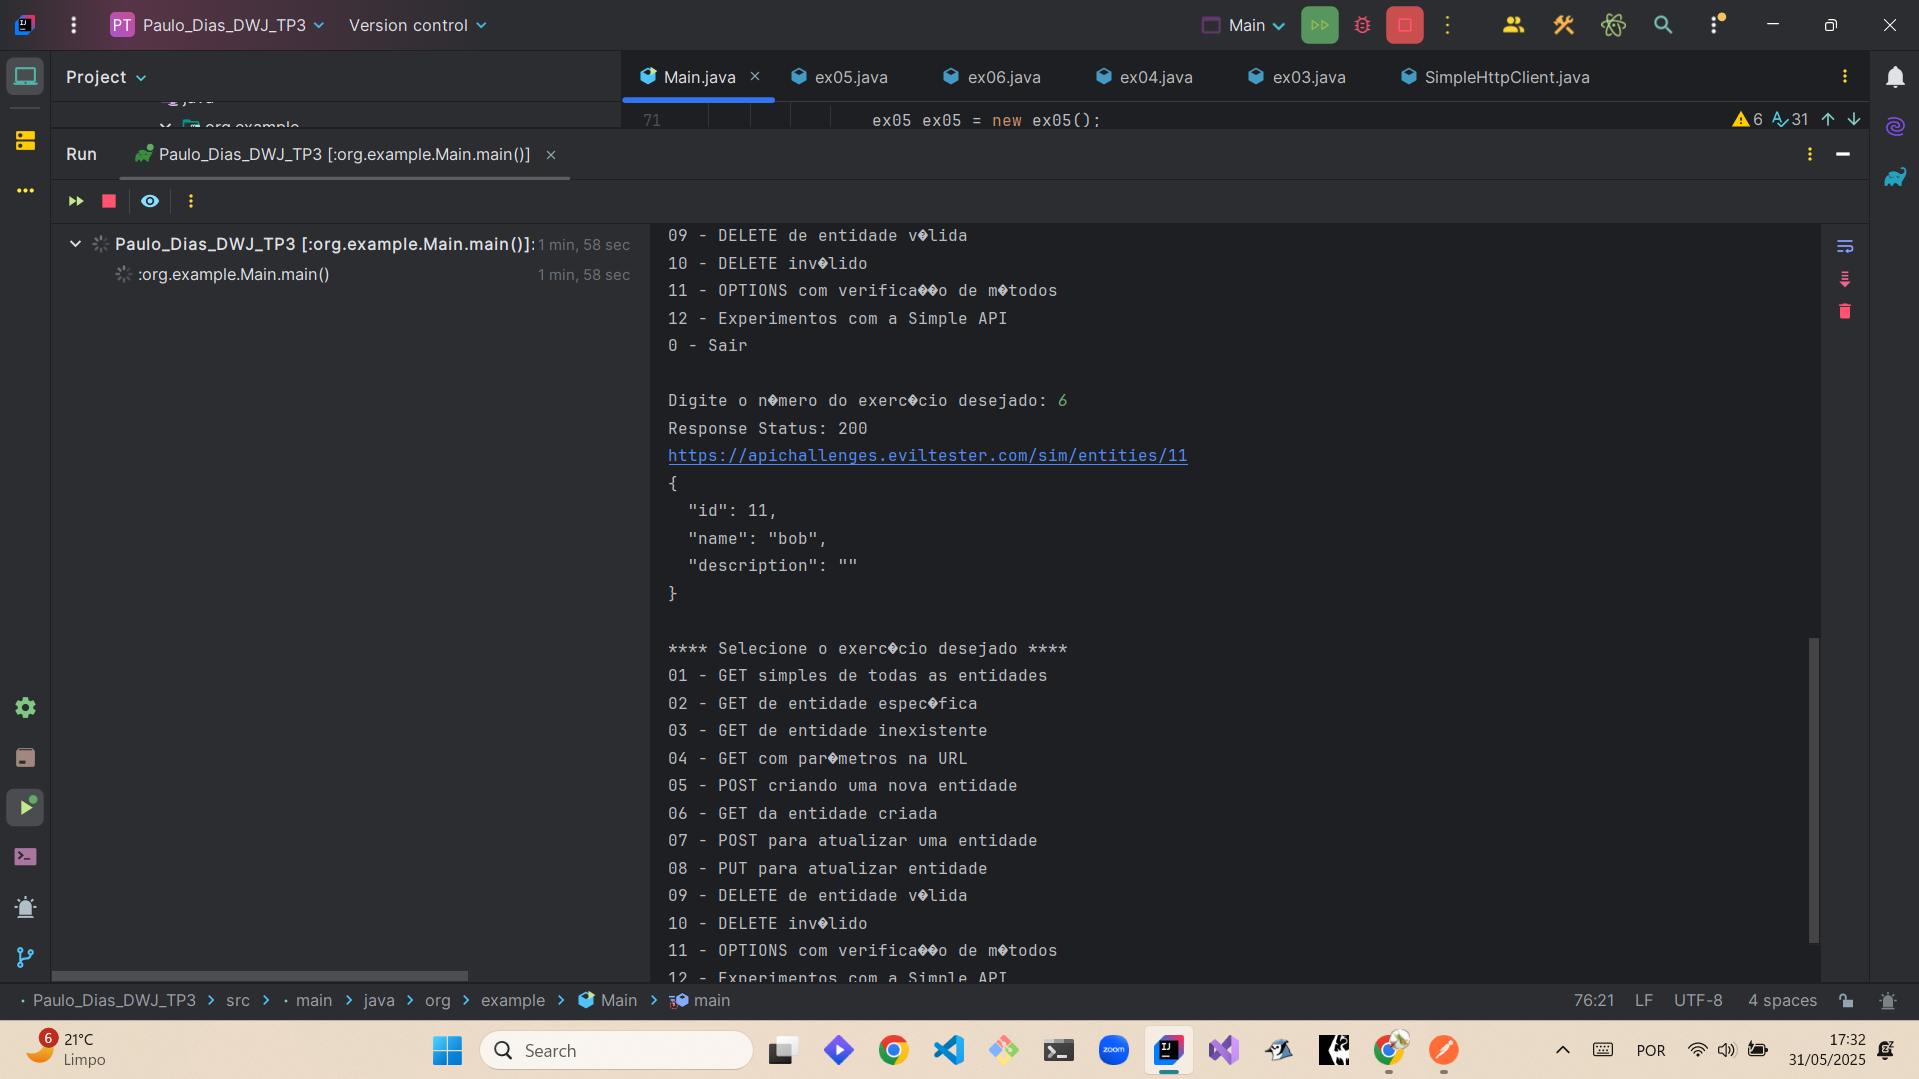

### Exercício 7 - POST para atualizar uma entidade

* Endpoint:POST https://apichallenges.eviltester.com/sim/entities/10

* Atualize a entidade 10 com o JSON:

    {"name": "atualizado"}

* Verifique a mudança por meio de uma requisição GET posterior.

### Resolução do exercício 7

    public void Ex07() throws IOException, URISyntaxException {
            String url = "https://apichallenges.eviltester.com/sim/entities/10";
    
            PostRequest postRequest = new PostRequest("atualizado" );
            String update10thParameter = SimpleHttpClient.post(url, postRequest);
    
            System.out.println("Post Response: " + update10thParameter);
    
        }

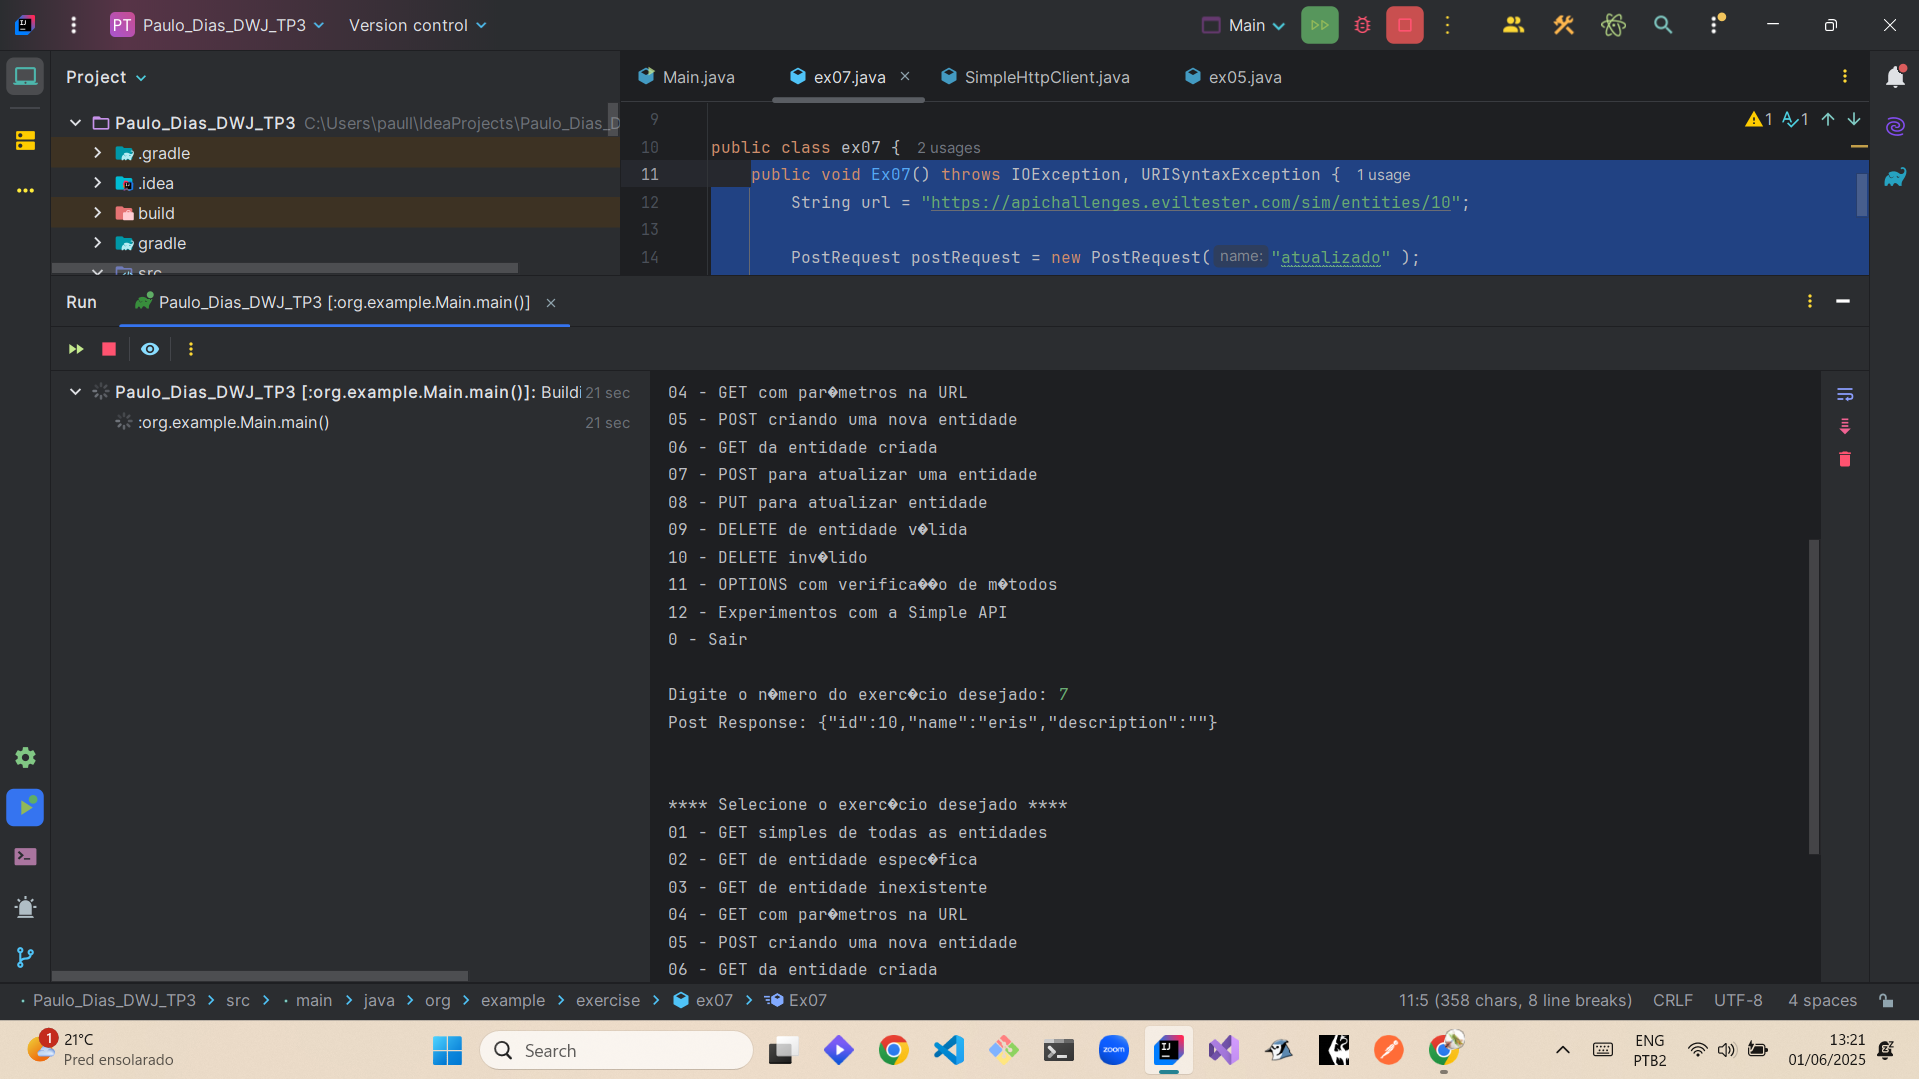

### Exercício 8 - PUT para atualizar entidade

* Endpoint:PUT https://apichallenges.eviltester.com/sim/entities/10

* Use PUT com o mesmo JSON do exercício anterior e avalie o comportamento da API em comparação com POST.

### Resolução do exercício 8

    public void Ex08() throws IOException, URISyntaxException {
        Gson gson = new Gson();
        String url = "https://apichallenges.eviltester.com/sim/entities/10";

        var postRequest = new PostRequest("atualizado", "" );
        String update10thParameter = SimpleHttpClient.put(url, postRequest);


        System.out.println("Put Response: " + update10thParameter);
        String jsonInputString = gson.toJson(postRequest);
        System.out.println("Corpo enviado: " + jsonInputString);

        String get10thParameter = SimpleHttpClient.get(url);
        System.out.println("Get Response: " + get10thParameter);
    }

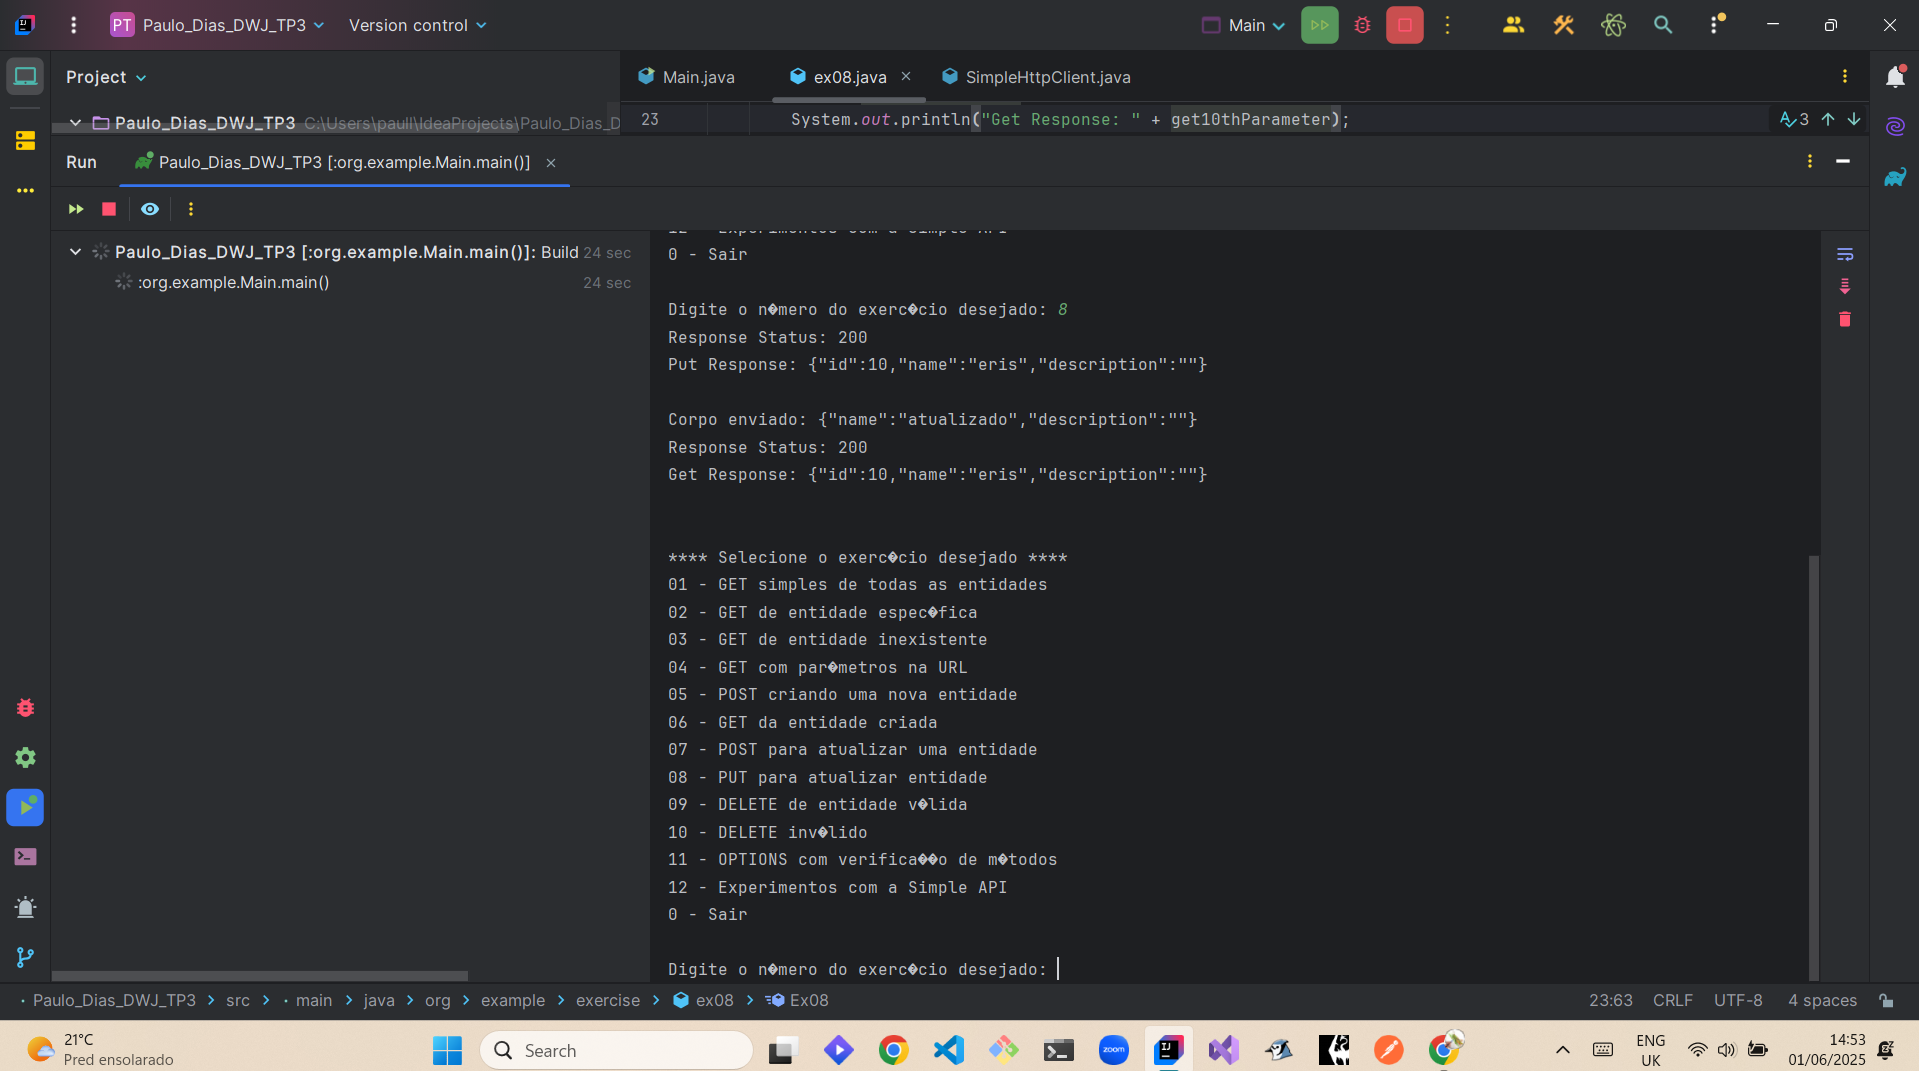

### Exercício 9 - DELETE de entidade válida

* Endpoint:DELETE https://apichallenges.eviltester.com/sim/entities/9

* Delete a entidade 9 e depois tente acessá-la com um GET para confirmar o retorno 404.

### Resolução do exercício 9

Para tal, fiz uma atualizacao no SimpleHttpClient, adicionando o metodo delete().

    public static String delete(String urlStr) throws IOException, URISyntaxException {
            HttpURLConnection conn = getConnection(urlStr, "DELETE");
    
            int status = conn.getResponseCode();
            System.out.println("Response Status: "+status);
            return lerResposta(conn);
        }

Codigo presente em ex09

    public void Ex09() throws IOException, URISyntaxException {
    
            Gson gson = new Gson();
            String url = "https://apichallenges.eviltester.com/sim/entities/9";
    
            String deleteRequest = SimpleHttpClient.delete(url);
    
    
            System.out.println("Delete Response: " + deleteRequest);
            String jsonInputString = gson.toJson(deleteRequest);
            System.out.println("Corpo enviado: " + jsonInputString);
            try
            {
                String get9thParameter = SimpleHttpClient.get(url);
                System.out.println("Get Response: " + get9thParameter);
            }
            catch (Exception e)
            {
                System.out.println(e);;
            }
        }

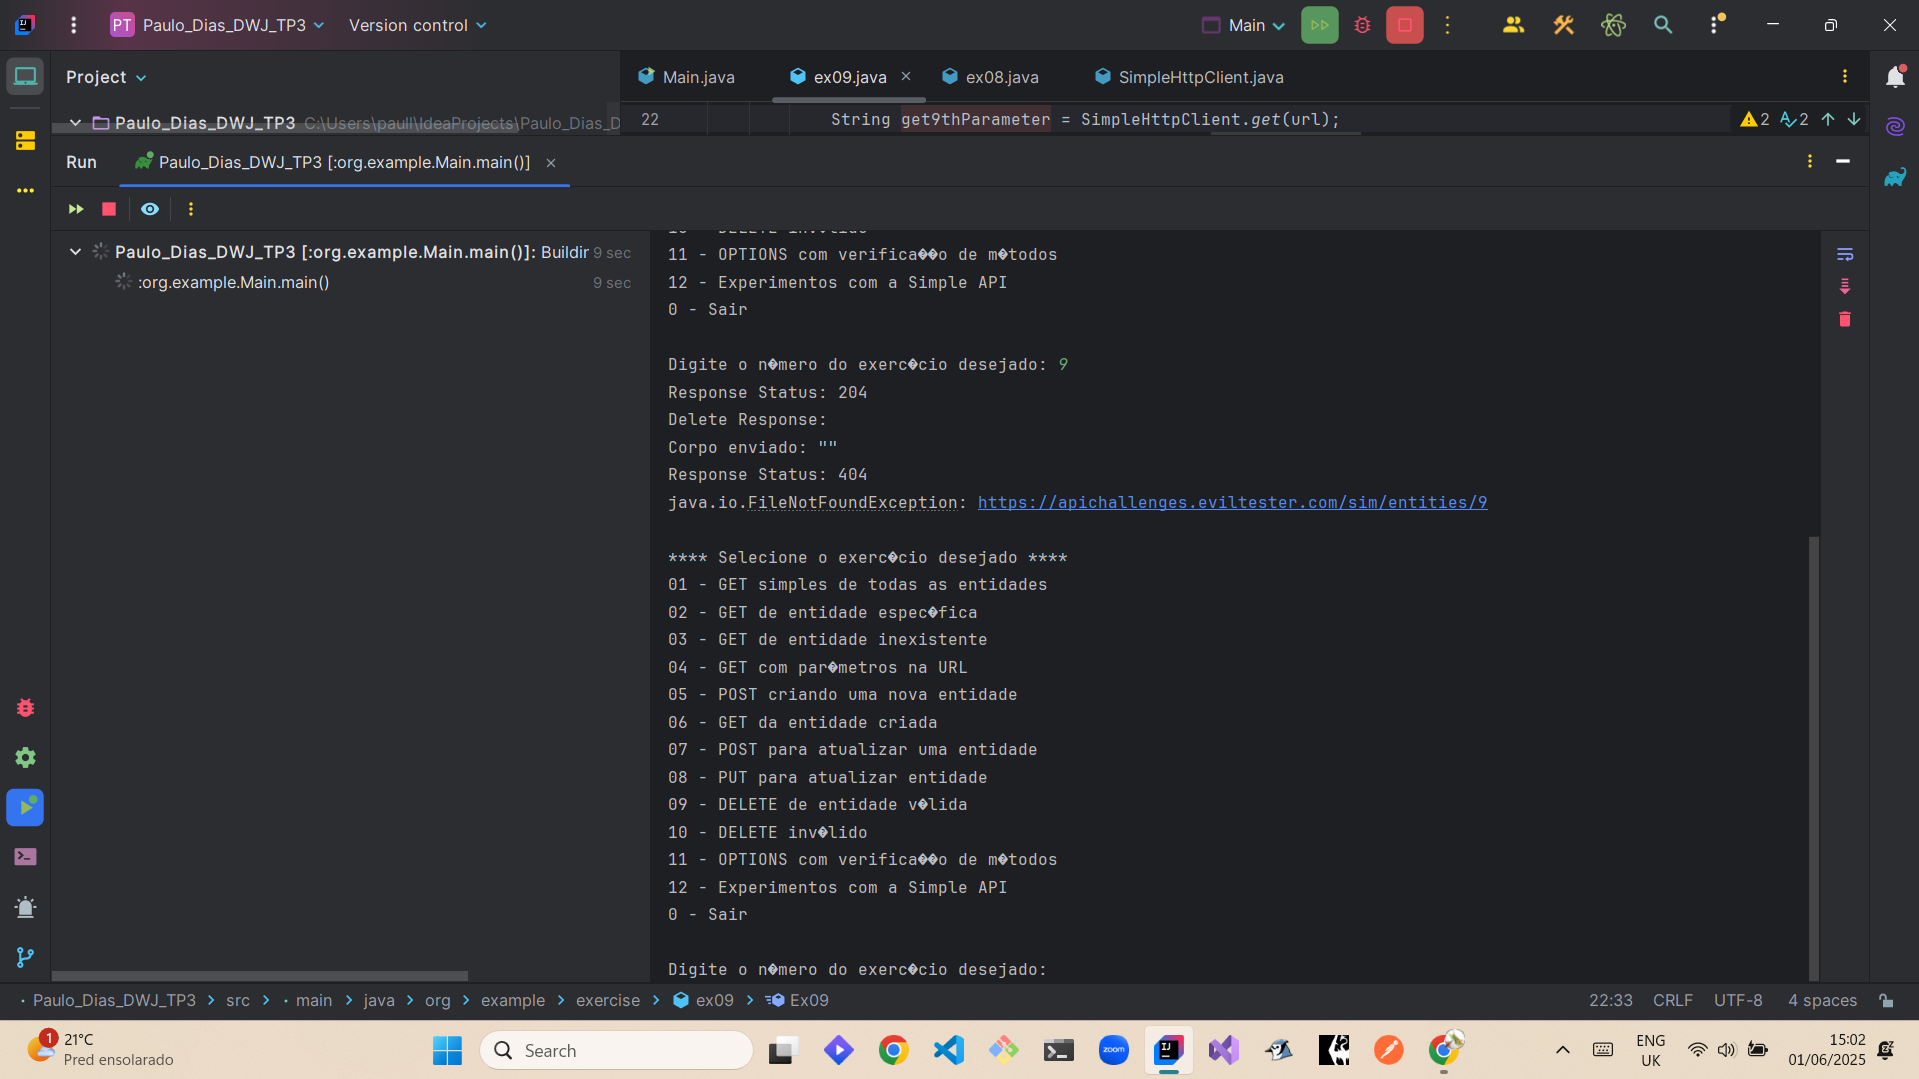

### Exercício 10 - DELETE inválido

* Endpoint:DELETE https://apichallenges.eviltester.com/sim/entities/2

* Tente deletar uma entidade que não pode ser removida. Capture o código de status (espera-se 403 ou 405) e mostre a resposta.

### Resolução do exercício 10

    public void Ex10() throws IOException, URISyntaxException {
            try
            {
            String url = "https://apichallenges.eviltester.com/sim/entities/2";
    
            String deleteRequest = SimpleHttpClient.delete(url);
    
    
            System.out.println("Delete Response: " + deleteRequest);
            
            }
            catch (Exception e)
            {
                System.out.println(e);;
            }
        }

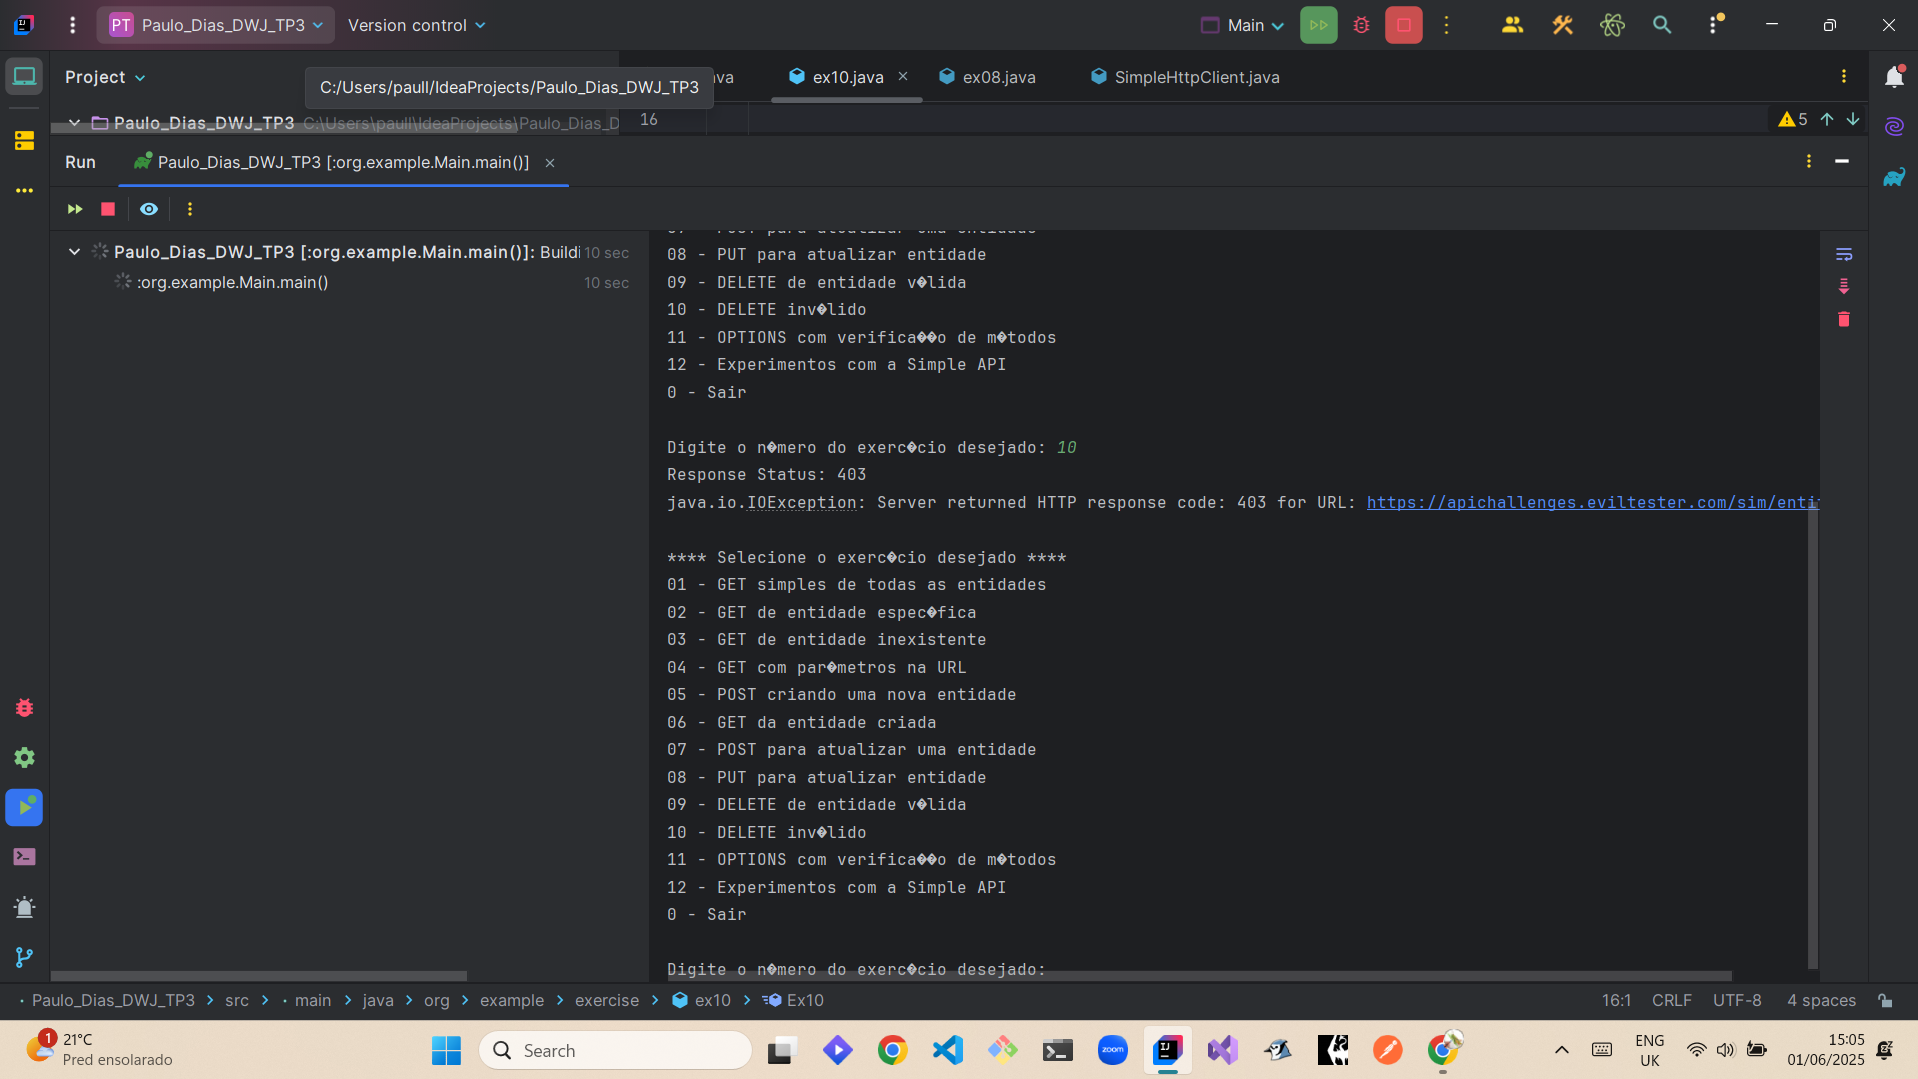

### Exercício 11 - OPTIONS com verificação de métodos

* Endpoint:OPTIONS https://apichallenges.eviltester.com/sim/entities

* Envie uma requisição OPTIONS e imprima os métodos HTTP permitidos presentes no cabeçalho Allow.

### Resolução do exercício 11

Para isso, fiz a inclusao do metodo options no SimpleHttpCliente

    public static String options(String urlStr) throws IOException, URISyntaxException {
            HttpURLConnection conn = getConnection(urlStr, "OPTIONS");
    
            int status = conn.getResponseCode();
            System.out.println("Response Status: "+status);
    
            String allowedMethods = conn.getHeaderField("Allow");
            return allowedMethods != null ? allowedMethods : "Nenhum método encontrado.";
        }

Codigo presente em ex11

    public void Ex11() throws IOException, URISyntaxException {
            String url = "https://apichallenges.eviltester.com/sim/entities";
    
            String optionsRequest = SimpleHttpClient.options(url);
    
            System.out.println("Options Response: " + optionsRequest);
        }

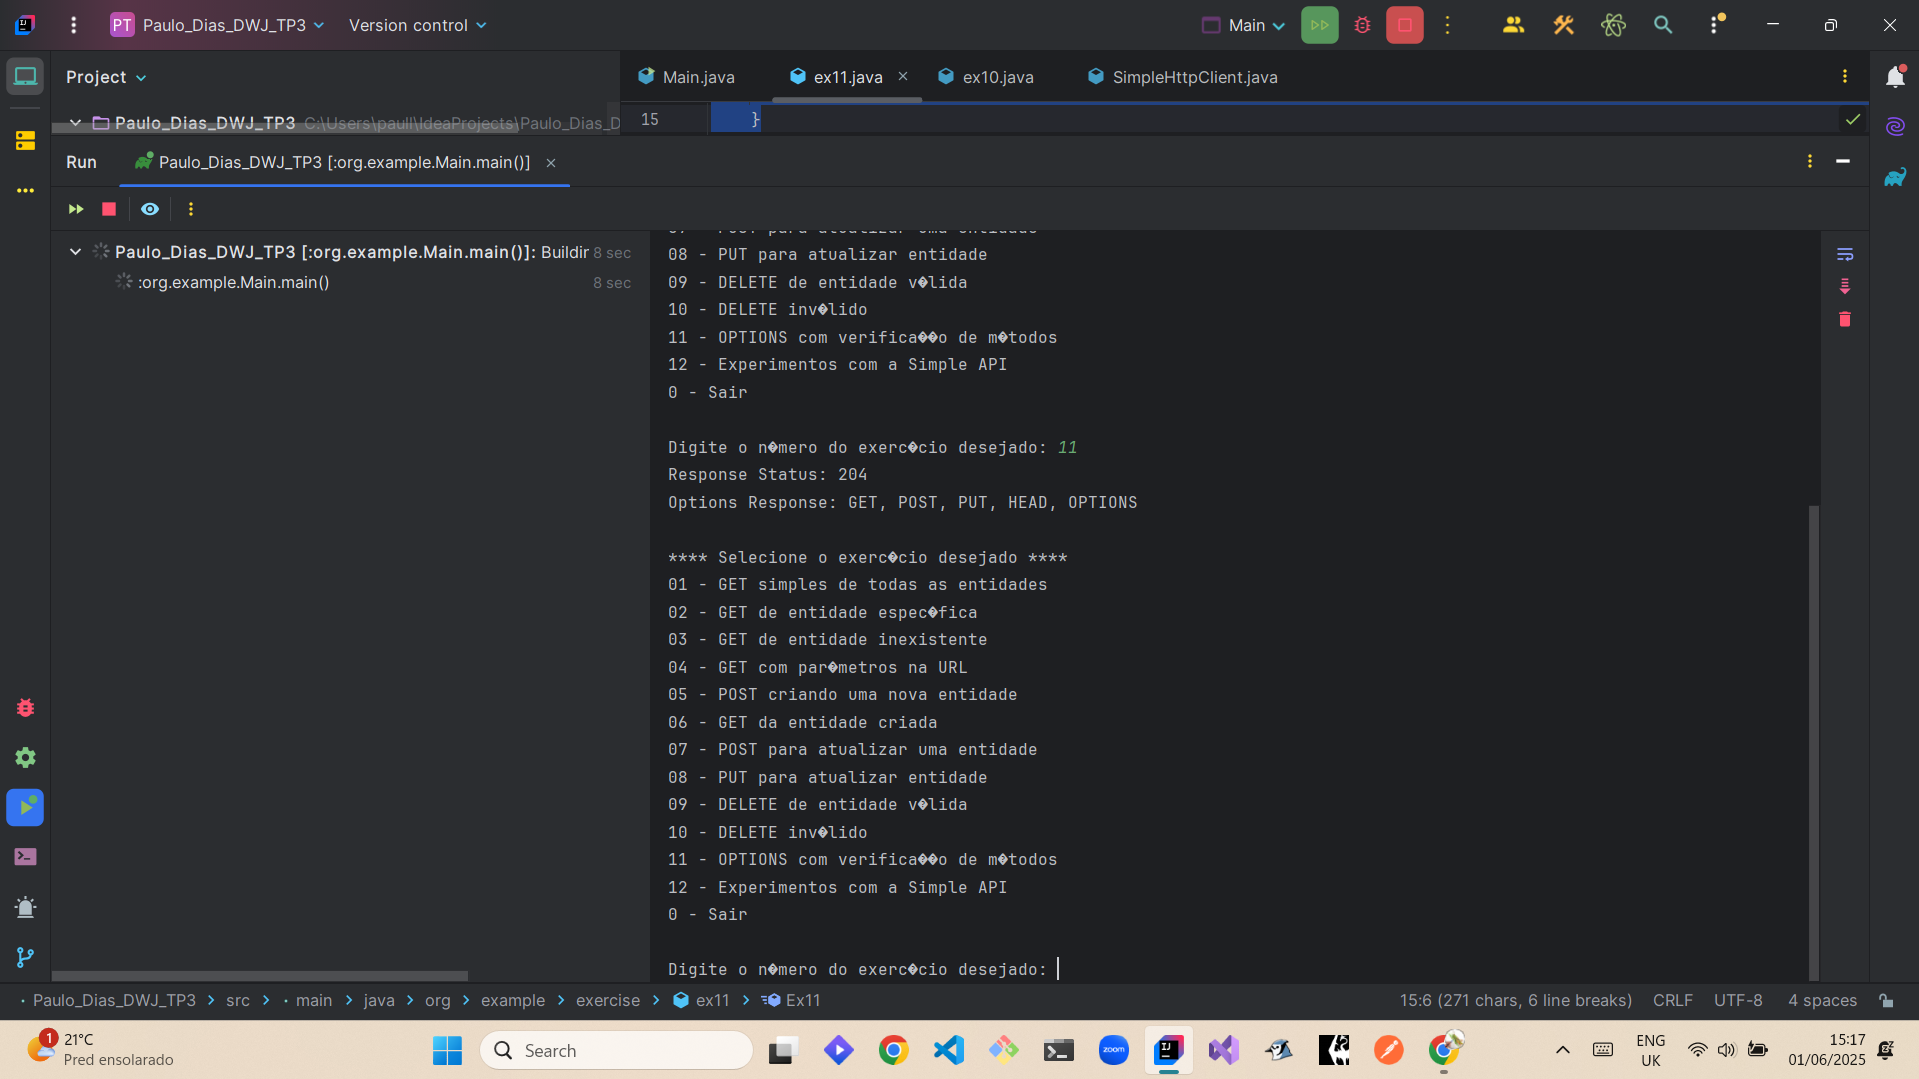

### Exercício 12 - Experimentos com a Simple API

* GET todos os itens
    * Endpoint:GET https://apichallenges.eviltester.com/simpleapi/items

* Gerar ISBN aleatório
    * Endpoint:GET https://apichallenges.eviltester.com/simpleapi/randomisbn

* Criar item com POST
    * Endpoint:POST https://apichallenges.eviltester.com/simpleapi/items

       {
        "isbn": "<inserir o ISBN gerado>",
        "title": "Livro de Teste",
        "author": "Aluno"
       }

* Atualizar item com PUT
    * Endpoint:PUT https://apichallenges.eviltester.com/simpleapi/items

* Remover item com DELETE
    * Endpoint:DELETE https://apichallenges.eviltester.com/simpleapi/items/<isbn>

### Resolução do exercício 12

    public void Ex12() throws IOException, URISyntaxException {
        String url1 = "https://apichallenges.eviltester.com/simpleapi/items";

        String getAll = SimpleHttpClient.get(url1);
        System.out.println("Get all Response: " + getAll);
        System.out.println("\n\n");

        String url2 = "https://apichallenges.eviltester.com/simpleapi/randomisbn";

        String getISBNRandon = SimpleHttpClient.get(url2);
        String ISBN = getISBNRandon.trim();
        System.out.println("Get randon ISBN Response: " + getISBNRandon);
        System.out.println("\n\n");

        String url3 = "https://apichallenges.eviltester.com/simpleapi/items";

        var item = new Items("cd", ISBN, 5.50, 50);

        String creatingItem = SimpleHttpClient.post(url3, item);
        System.out.println("Creating item Response: " + creatingItem);
        System.out.println("\n\n");

        JsonObject jsonObject = JsonParser.parseString(creatingItem).getAsJsonObject();
        String id = jsonObject.get("id").getAsString();
        String url4 = "https://apichallenges.eviltester.com/simpleapi/items/" + id;

        var itemAdded = new Items("cd", ISBN, 1.00, 100);

        String updatingItem = SimpleHttpClient.put(url4, itemAdded);
        System.out.println("Updating item Response: " + updatingItem);
        System.out.println("\n\n");

        String url5 = "https://apichallenges.eviltester.com/simpleapi/items/" + id;

        String deletingItem = SimpleHttpClient.delete(url5);
        System.out.println("Deleting item Response: " + deletingItem);
        System.out.println("\n\n");
    }

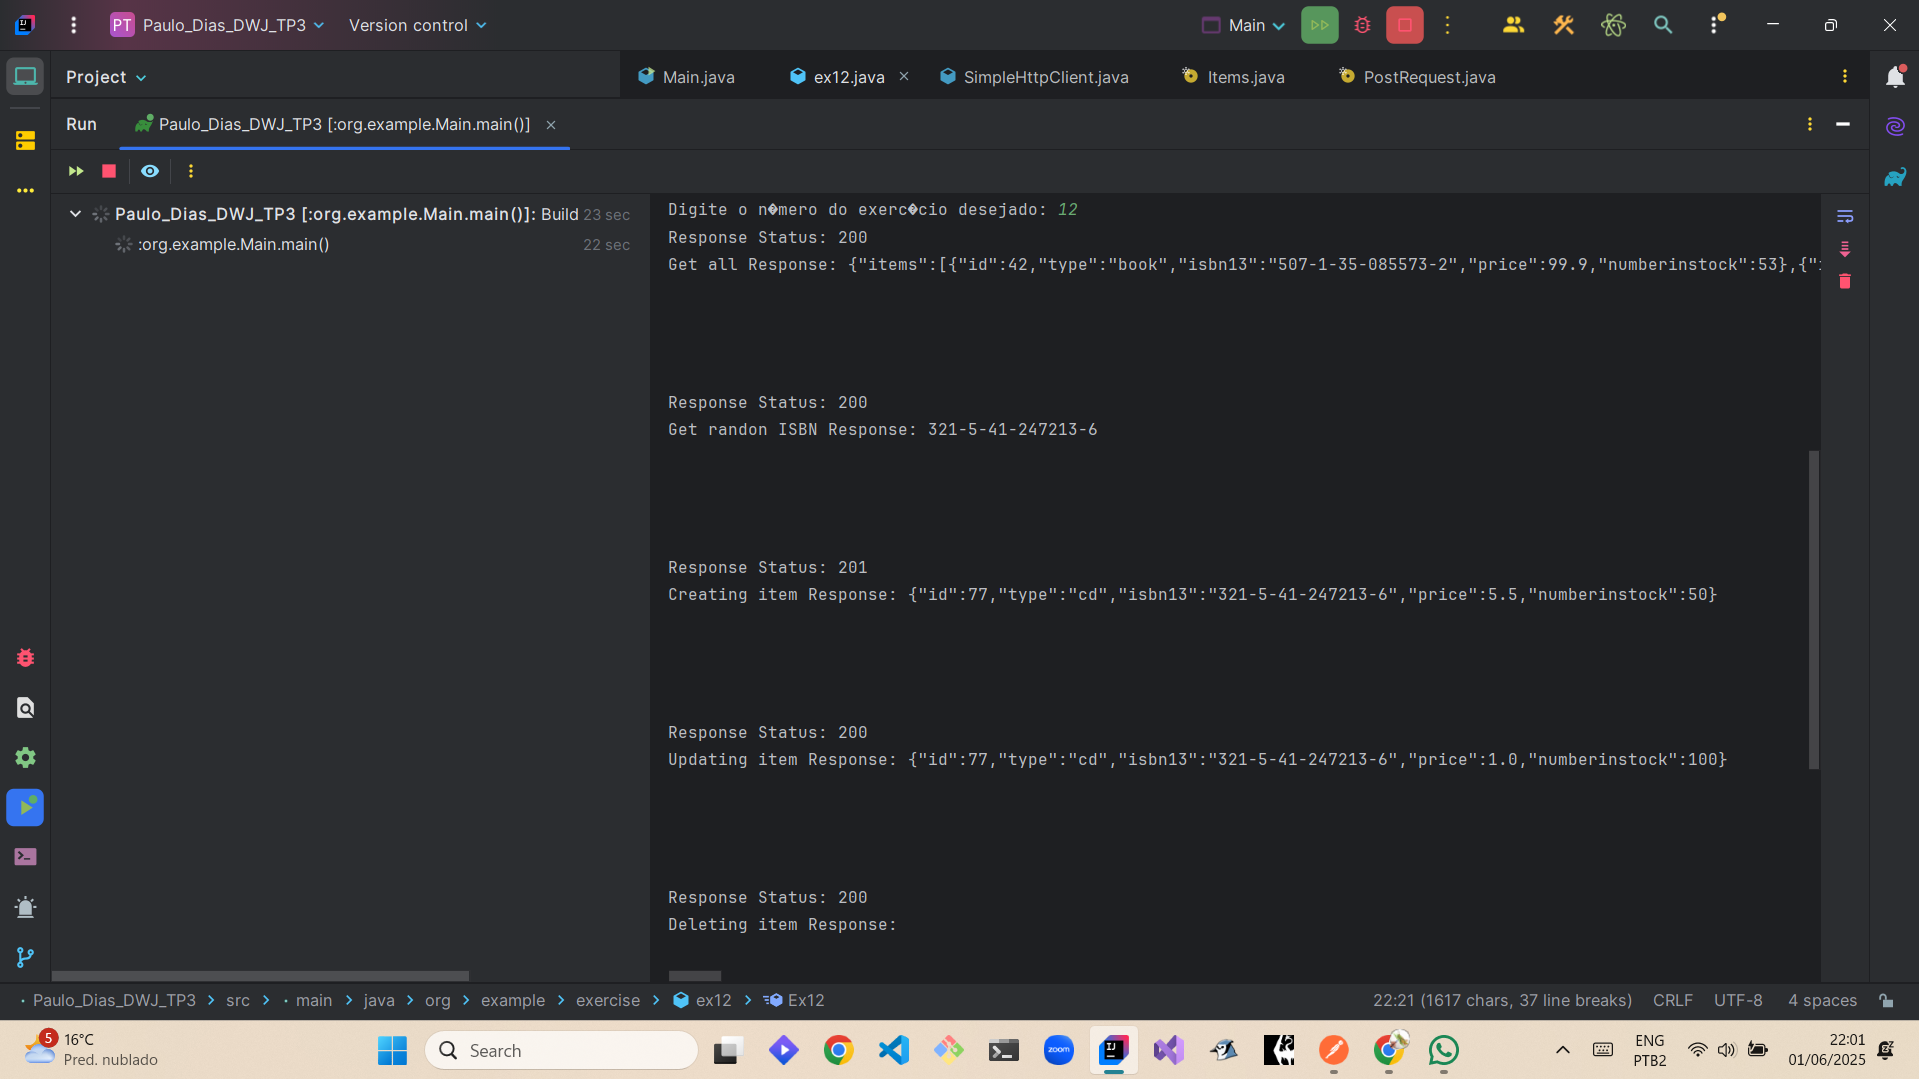